# Hierarchical Clustering Customer Segmentation

#### Data sources:

- https://www.kaggle.com/code/rahulbordoloi/customer-segmentation/input

## Data Loading and Initial Exploration

### Import libraries and load data

In [1]:
# Import libraries
import os
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Label present working directory
pwd = os.getcwd()

# Load raw data, got "'utf-8' codec" encoding error, so added encoding='unicode_escape' argument
orders_data_original = pd.read_csv(pwd + "\\raw_data\cust_orders_data.csv", encoding='unicode_escape')

# Copy and visualise raw data
data = orders_data_original.copy()

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


### Data Cleaning & Exploration

In [3]:
# Convert string columns of interest to corresponding int format
data["Ever_Married"] = data.Ever_Married.map(dict(Yes=1, No=0))
data["Graduated"] = data.Graduated.map(dict(Yes=1, No=0))
data["Gender"] = data.Gender.map(dict(Male=1, Female=0))
data["Spending_Score"] = data.Spending_Score.map(dict(Low=0, Average=1, High=2))

# Drop string columns
data.drop(columns="Var_1", axis=1, inplace=True)

# Inspect cleaned data
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458989,0,1.0,36,1.0,Engineer,0.0,0,1.0
1,458994,1,1.0,37,1.0,Healthcare,8.0,1,4.0
2,458996,0,1.0,69,0.0,NaN,0.0,0,1.0
3,459000,1,1.0,59,0.0,Executive,11.0,2,2.0
4,459001,0,0.0,19,0.0,Marketing,NaN,0,4.0


In [4]:
# Create version of data excluding non-numeric values
data_num = data.drop(columns="Profession", axis=1)

# Explore data structures
data_num.describe()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
count,2627.000000,2627.000000,2577.000000,2627.000000,2603.000000,2358.000000,2627.000000,2514.000000
mean,463433.918919,0.542063,0.589833,43.649791,0.615444,2.552587,0.531785,2.825378
std,2618.245698,0.498322,0.491959,16.967015,0.486584,3.341094,0.736931,1.551906
min,458989.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000
25%,461162.500000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,2.000000
50%,463379.000000,1.000000,1.000000,41.000000,1.000000,1.000000,0.000000,2.000000
75%,465696.000000,1.000000,1.000000,53.000000,1.000000,4.000000,1.000000,4.000000
max,467968.000000,1.000000,1.000000,89.000000,1.000000,14.000000,2.000000,9.000000


### Data Correlation Estimations

In [5]:
data_num

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
0,458989,0,1.0,36,1.0,0.0,0,1.0
1,458994,1,1.0,37,1.0,8.0,1,4.0
2,458996,0,1.0,69,0.0,0.0,0,1.0
3,459000,1,1.0,59,0.0,11.0,2,2.0
4,459001,0,0.0,19,0.0,NaN,0,4.0
...,...,...,...,...,...,...,...,...
2622,467954,1,0.0,29,0.0,9.0,0,4.0
2623,467958,0,0.0,35,1.0,1.0,0,1.0
2624,467960,0,0.0,53,1.0,NaN,0,2.0
2625,467961,1,1.0,47,1.0,1.0,2,5.0


In [6]:
# Use standard Pearson correlation (linear dependency between df variables)
data_num.corr()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size
ID,1.000000,0.002815,0.040351,-0.022940,-0.005830,-0.025445,-0.001890,0.020830
Gender,0.002815,1.000000,0.109114,0.010165,-0.057306,-0.071112,0.051577,0.071068
Ever_Married,0.040351,0.109114,1.000000,0.575667,0.204236,-0.114447,0.598737,-0.087478
Age,-0.022940,0.010165,0.575667,1.000000,0.231541,-0.186238,0.442046,-0.285237
Graduated,-0.005830,-0.057306,0.204236,0.231541,1.000000,0.052683,0.090960,-0.271497
Work_Experience,-0.025445,-0.071112,-0.114447,-0.186238,0.052683,1.000000,-0.077450,-0.071253
Spending_Score,-0.001890,0.051577,0.598737,0.442046,0.090960,-0.077450,1.000000,0.078863
Family_Size,0.020830,0.071068,-0.087478,-0.285237,-0.271497,-0.071253,0.078863,1.000000


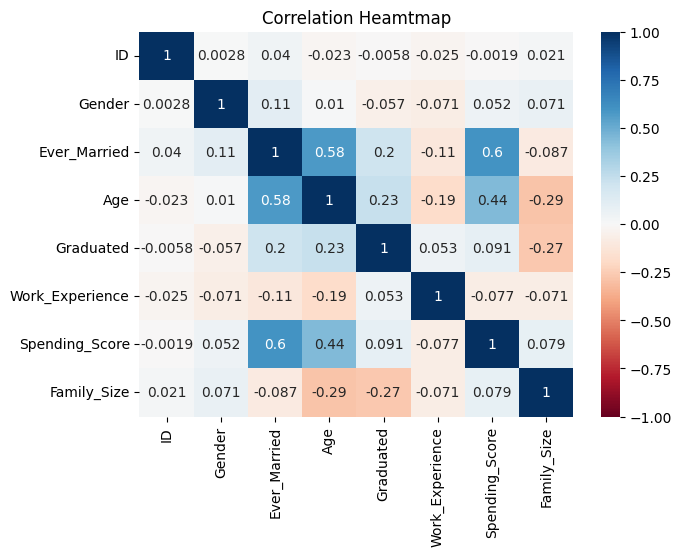

In [7]:
# Visualise correlations using heatmap
plt.figure(figsize=(7,5))
s = sns.heatmap(data_num.corr(), 
                annot=True,
                cmap="RdBu",
                vmin=-1,
                vmax=1)

plt.title("Correlation Heamtmap")
plt.show()

## Statistical Pre-Processing

#### Features Selection & Data Standardisation

In [15]:
# Import libraries
from sklearn.preprocessing import StandardScaler

# Define scaler for standardisation
scaler = StandardScaler()

# Standardise all numerical features
segmentation_stdised = pd.DataFrame(scaler.fit_transform(data_num.iloc[:,1:]))

This particular customer segmentation will take 7 separate data features into consideration per customer ID, i.e.:
1) Gender           - Binary input, either male (1) or female (0)
2) Ever_Married	    - Binary input, either yes (1) or no (0)
3) Age	            - Integer input, age of customer
4) Graduated	    - Binary input, either yes (1) or no (0)
5) Work_Experience	- Integer input, years of work for each customer
6) Spending_Score	- Integer input, overall customer score representative of spending volume
7) Family_Size      - Integer input, total number of members in each customer's family

## Customer Segmentation

#### Hierarchichal Clustering

In [21]:
# Import libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Remove any NULL (NaN) values prior to linking
seg_stdised_data = segmentation_stdised.fillna(0)

# Define hierarchichal clustering function
hier_clust = linkage(seg_stdised_data, method="ward")

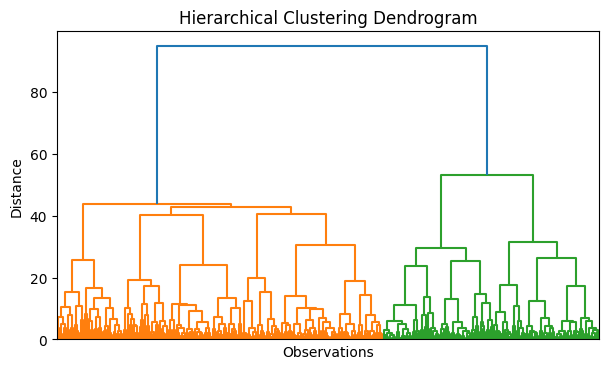

In [22]:
# Visualise dendrogram
plt.figure(figsize=(7,4))
dendrogram(hier_clust,
           show_leaf_counts=False,
           no_labels=True)

plt.title("Hierarchical Clustering Dendrogram")
plt.ylabel("Distance")
plt.xlabel("Observations")

plt.show()

- Too many branches, unclear and probably 'overfit'.
- Create simpler version with less complexity, possibly producing a better segmentation.

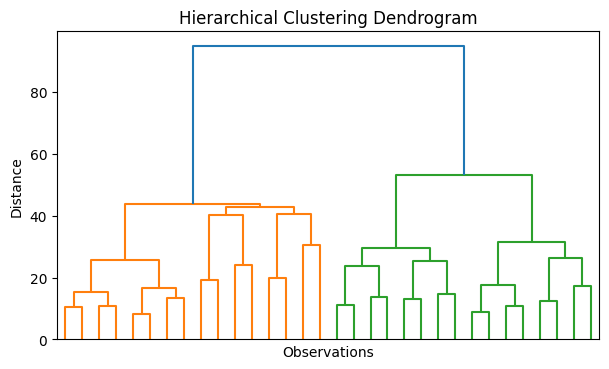

In [23]:
# Visualise new dendrogram constrained by adding truncate_mode to a maximum of 4 split levels (p)
plt.figure(figsize=(7,4))
dendrogram(hier_clust,
           truncate_mode="level",
           p=4,
           show_leaf_counts=False,
           no_labels=True)

plt.title("Hierarchical Clustering Dendrogram")
plt.ylabel("Distance")
plt.xlabel("Observations")

plt.show()

Produces a much more useable customer segmentation model highlighting 2 main clusters